### Prophet
Prophet Library is an easier alternative to the statstools library as er don;t need to explicitly define what parameters to use for AR, I and MA components of the model. However, it requires the data to be in a certain format to be used. It was created to work with daily or ever hourly or minute data which can be quite large.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from prophet import Prophet

C:\Users\shisk\anaconda3\envs\sklearn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Formatting Data to be used with Prophet Library

In [4]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [5]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


<Axes: >

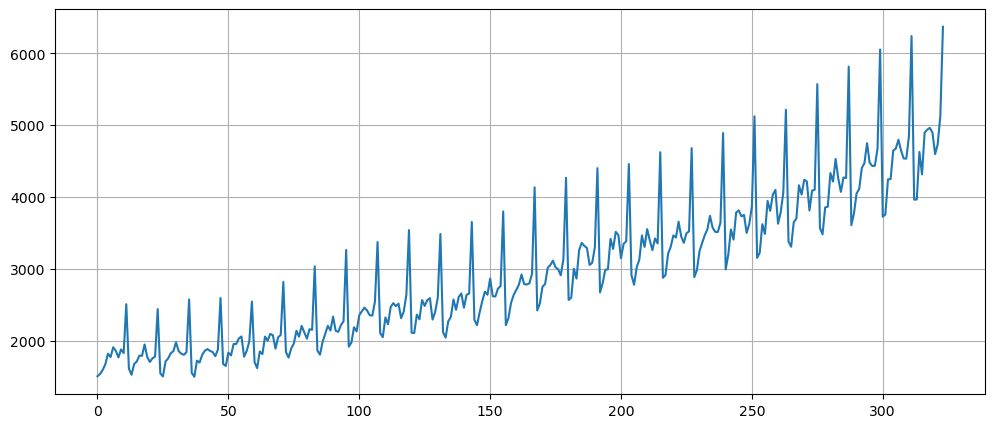

In [7]:
df['beer'].plot(figsize = (12, 5), grid = True)
'''
This is a monthly data with both seasonality and trend.
'''

In [8]:
# rename column to be usable with prophet
df.columns = ['ds', 'y']

In [9]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
'''
Note that we still have integer index and don't require datetime to be the index.
'''
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [12]:
m = Prophet()

In [13]:
m.fit(df)

10:02:23 - cmdstanpy - INFO - Chain [1] start processing
10:02:25 - cmdstanpy - INFO - Chain [1] done processing


### Forecast into the Future

In [14]:
# Placeholder to hold future predictions
future = m.make_future_dataframe(periods = 24, freq = 'MS')

In [15]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [16]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [17]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [18]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [19]:
len(df)

324

In [20]:
# the placeholder dataframe will contain training values as well as future predictions
len(future)

348

In [21]:
forecast = m.predict(future)

In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.898400,1149.312299,1467.709397,1772.898400,1772.898400,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,0.0,0.0,0.0,1311.043734
1,1992-02-01,1775.730691,1202.911806,1518.894019,1775.730691,1775.730691,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,0.0,0.0,0.0,1348.171720
2,1992-03-01,1778.380254,1436.659355,1761.009250,1778.380254,1778.380254,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,0.0,0.0,0.0,1599.177870
3,1992-04-01,1781.212546,1404.749764,1747.008856,1781.212546,1781.212546,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,0.0,0.0,0.0,1584.963880
4,1992-05-01,1783.953473,1667.859542,2004.144234,1783.953473,1783.953473,45.147907,45.147907,45.147907,45.147907,45.147907,45.147907,0.0,0.0,0.0,1829.101380


In [23]:
forecast[['ds', 'yhat']].head(12)

,ds,yhat
0,1992-01-01,1311.043734
1,1992-02-01,1348.171720
2,1992-03-01,1599.177870
3,1992-04-01,1584.963880
4,1992-05-01,1829.101380
5,1992-06-01,1796.855947
6,1992-07-01,1916.561963
7,1992-08-01,1832.605339
8,1992-09-01,1662.274672
9,1992-10-01,1754.642635


In [24]:
df.head(12)

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
5,1992-06-01,1775
6,1992-07-01,1912
7,1992-08-01,1862
8,1992-09-01,1770
9,1992-10-01,1882


In [25]:
# We are only interested in 'yhat' and the upper and lower bound
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4468.476796,4786.751674,4628.441552
337,2020-02-01,4516.133152,4829.991033,4678.807340
338,2020-03-01,4783.692004,5111.162827,4942.197241
339,2020-04-01,4777.782489,5110.647758,4941.221054
340,2020-05-01,5030.439192,5369.117767,5198.169330
341,2020-06-01,5010.536576,5347.719977,5179.161700
342,2020-07-01,5157.166427,5479.124008,5311.678492
343,2020-08-01,5072.421087,5409.827107,5240.959670
344,2020-09-01,4913.995746,5239.065220,5083.866806
345,2020-10-01,5027.619175,5348.954447,5189.045546


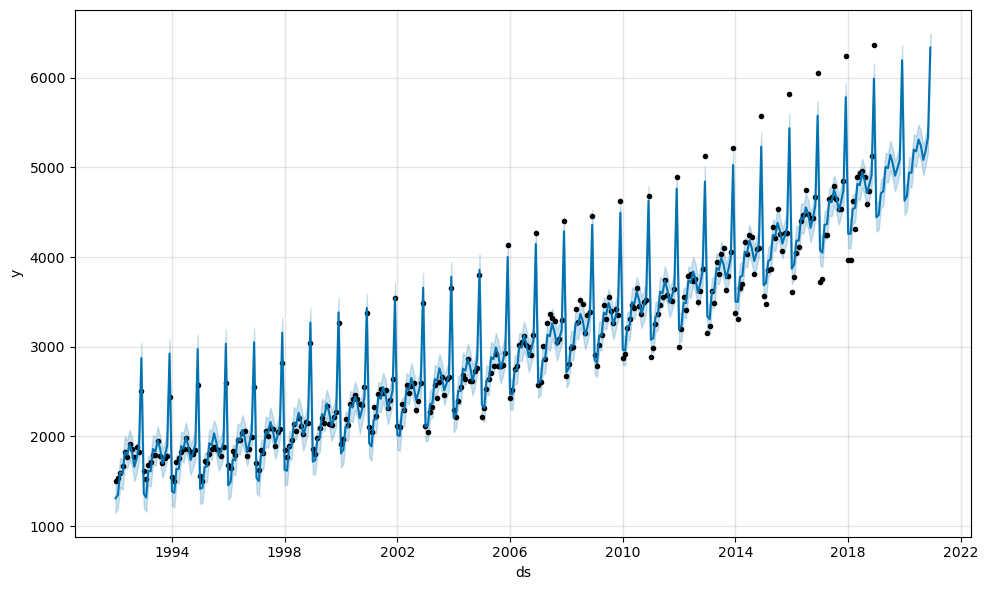

In [26]:
# plotting
m.plot(forecast);

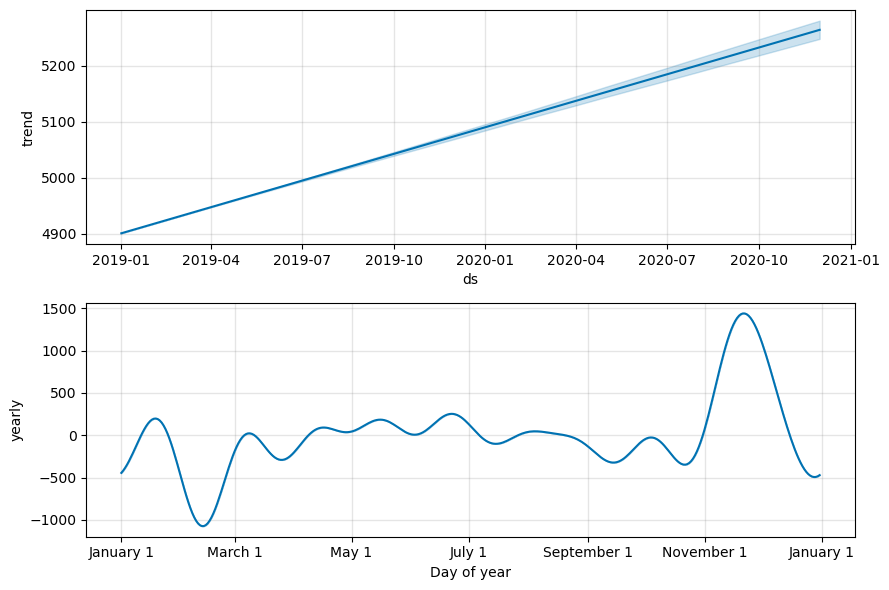

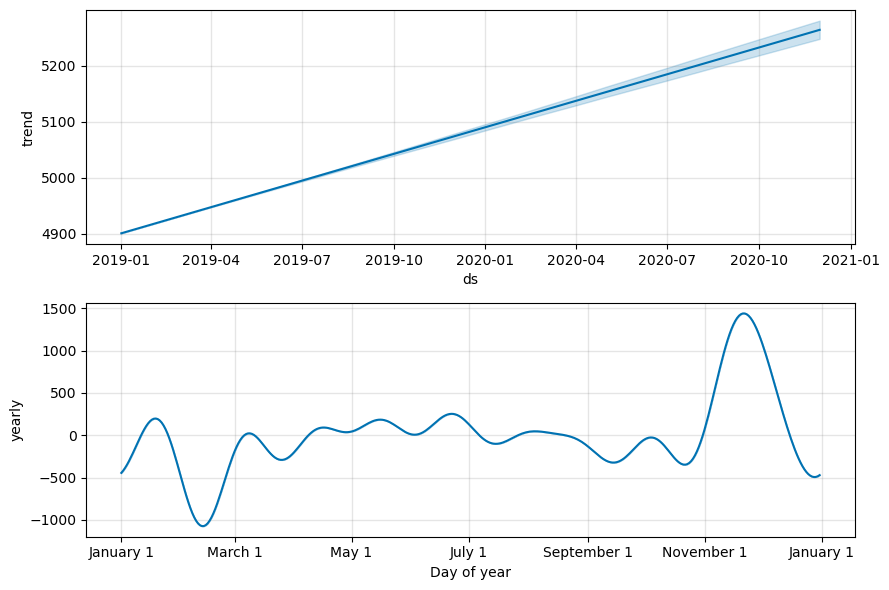

In [30]:
m.plot_components(forecast[-24:])